In [ ]:
# The keras library is used for building and training deep learning models
import keras
import numpy as np
# The cifar10 module from the keras.datasets package contains the CIFAR-10 dataset, which is a collection of 60,000 32x32 color images
# in 10 classes, with 6,000 images per class. T
# he dataset is divided into 50,000 training images and 10,000 testing images.
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2



## **CIFAR**-10:

The CIFAR-10 dataset is a collection of 60,000 32x32 color images, each of which belongs to one of ten different classes. The classes are represented by integer labels ranging from 0 to 9, with each integer corresponding to a particular class:

0. Airplane
1. Automobile
2. Bird
3. Cat
4. Deer
5. Dog
6. Frog
7. Horse
8. Ship
9. Truck

Each class represents a different type of object that appears in the images. Here's a brief description of each class:

- Airplane: This class includes various types of airplanes, such as commercial airliners, military fighter jets, and small private planes.

- Automobile: This class includes various types of road vehicles, such as cars, trucks, vans, and SUVs.

- Bird: This class includes various species of birds, ranging from common birds like sparrows and pigeons to exotic birds like parrots and toucans.

- Cat: This class includes images of domestic cats and some wild cat species, such as tigers and lions.

- Deer: This class includes various deer species, including elk, moose, and reindeer.

- Dog: This class includes various dog breeds, including small lap dogs, hunting dogs, and large guard dogs.

- Frog: This class includes various frog species, such as tree frogs, bullfrogs, and poison dart frogs.

- Horse: This class includes various horse breeds, including racehorses, workhorses, and ponies.

- Ship: This class includes various types of ships, such as cargo ships, cruise ships, and naval vessels.

- Truck: This class includes various types of trucks, such as pickup trucks, delivery trucks, and tractor-trailers.

The CIFAR-10 dataset is often used as a benchmark for evaluating the performance of machine learning algorithms on image classification tasks. The small size and low resolution of the images make the dataset challenging, and the variety of object classes means that algorithms must be able to recognize a diverse range of patterns and features in the images.

In [ ]:
# Load the CIFAR-10 dataset into training and testing sets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

The variable train_images is a 4D numpy array containing the images in the training set, where each image is a 32x32 pixel color image represented by three channels (red, green, and blue). The variable train_labels is a 1D numpy array containing the corresponding labels for each image in the training set.
Similarly, the variable test_images is a 4D numpy array containing the images in the testing set, and test_labels is a 1D numpy array containing the corresponding labels for each image in the testing set.
Overall, this line of code is a common method used to load and split datasets for machine learning tasks, allowing us to train a model on the training set and evaluate its performance on the testing set.


In [ ]:
# Print the shape of the training images array
# Number of samples, Height, Width, Number of channels
print("train images:", train_images.shape)
print("train labels:", train_labels.shape)
print("test images:", test_images.shape)
print("test labels:", test_labels.shape)

train images: (50000, 32, 32, 3)
train labels: (50000, 1)
test images: (10000, 32, 32, 3)
test labels: (10000, 1)


In [ ]:
# This dictionary maps a numerical label to an object class name.
classes = {
  6 : 'frog',
  9 : 'truck',
  4 : 'deer',
  1 : 'automobile',
  2 : 'bird',
  7 : 'horse',
  8 : 'ship',
  3 : 'cat',
  5 : 'dog',
  0 : 'airplane'
}

Text(0.5, 1.0, 'ship')

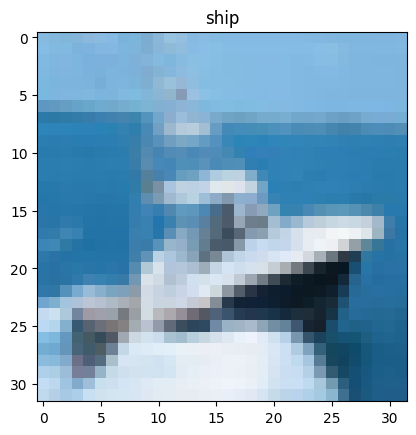

In [ ]:
plt.imshow(train_images[8])
plt.title(classes[int(train_labels[8][0])])


# Preprocessing in dense neural networks

## Data normalization:

In deep learning models, the input data is typically represented as a matrix of numerical values. For image datasets, this matrix represents the pixel values of the images. The pixel values can range from 0 to 255 for grayscale images and from 0 to 255 for each color channel in RGB images.

However, when these pixel values are used as input features for a deep learning model, having a large range of values can make it difficult for the model to learn useful patterns. This is because some features may have much larger values than others, which can cause the model to give too much weight to those features in its calculations.

To address this issue, we can apply data normalization, which scales the pixel values to a common range. One common technique for doing this is to divide all pixel values by 255, which scales the values between 0 and 1. This ensures that all features have roughly the same scale and range, which can help the model learn more effectively.

Another benefit of normalizing the data is that it can help reduce the effect of outliers. Outliers are extreme values that can skew the model's predictions. For example, if an image has a few very bright pixels that are much brighter than the rest of the image, these pixels could dominate the model's calculations and cause it to make incorrect predictions. Normalizing the data can help mitigate this effect by making all pixel values fall within a similar range.

Overall, data normalization is an important preprocessing step for many types of deep learning models, including dense neural networks. It helps to ensure that the input features have a consistent scale and range, which can improve the accuracy and robustness of the model.

In [ ]:
# Convert the data type of train and test images to 'float32' and normalize the pixel values between 0 and 1
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255


## One hot encoding:

One hot encoding is a technique that transforms categorical variables into binary vectors. The idea behind one hot encoding is to create a new binary column for each distinct category in the original categorical column. Each row in the new binary columns will have a single "1" value in the corresponding position of the category it represents, and all other values will be zero.

For instance, if we had three distinct categories - apple, orange, and mango - we would create three new binary columns: "apple", "orange", and "mango". Each row corresponding to an observation in the original data would have exactly one "1" in the column corresponding to its fruit type, and zeroes in all the other columns. So, for example, an apple would have [1,0,0] in the "apple" column, an orange would have [0,1,0], and so on.

One hot encoding is useful because many machine learning algorithms cannot work directly with categorical data. By converting categorical data into numeric data using one hot encoding, we can train machine learning models on such data.

In a dense neural network, we use one hot encoding to represent the target variable (i.e., the categorical variable we want to predict) as a binary vector that can be used by the output layer of the network.
We used the to_categorical function from Keras to one hot encode the target variable into a binary vector for each observation.


In [ ]:
# One hot encoding of the target variable
from keras.utils import to_categorical

# number of classes in the classification problem
num_classes = 10
# Convert train labels to one hot encoded vectors
train_labels = to_categorical(train_labels, num_classes)
# Convert test labels to one hot encoded vectors
test_labels = to_categorical(test_labels, num_classes)


In [ ]:
train_labels[8]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
# Import the necessary libraries for creating a sequential model
from keras.models import Sequential
# Import the Dense and Flatten layers to be added to the model
from keras.layers import Dense, Flatten


The Sequential class is used for creating models layer-by-layer in a linear fashion. The Dense layer represents a densely connected neural network layer, and the Flatten layer is used for flattening the input data before passing it into a dense layer.

In [ ]:
# Create a sequential model object
model = Sequential()
# This creates an empty sequential model object to which we can add layers.

# Add a Flatten layer to the model with an input shape of 32x32x3
model.add(Flatten(input_shape = (32, 32,3)))
# This adds a Flatten layer to the model with an input shape of 32x32x3.
# The Flatten layer is used to flatten the input image data into a 1D array before passing it on to the next layer.

# Add a dense layer with 250 units and ReLU activation function
model.add(Dense(250, activation='relu'))
#  This adds a dense layer with 250 units and ReLU activation function to the model.
# Dense layers are fully connected layers where each neuron in the current layer is connected to every neuron in the previous layer.

# Add another dense layer with 128 units and ReLU activation function
model.add(Dense(128, activation='relu'))
# This adds another dense layer with 128 units and ReLU activation function to the model.

# Add a final dense layer with 10 units and softmax activation function for classification
model.add(Dense(10, activation='softmax'))
# This adds the final dense layer with 10 units and softmax activation function for classification.
# Softmax activation is commonly used in multi-class classification problems because it outputs a probability distribution over the classes.


The first layer added to the model is a Flatten layer with an input shape of (32, 32, 3). This means that the model expects input data in the form of 2D images, each with dimensions of 32 x 32 pixels and three color channels (RGB). The Flatten layer is used to flatten the input data into a 1D array before it gets passed to the next layer.

The next two layers are Dense layers. Each Dense layer specifies a number of units (neurons) and an activation function. The first Dense layer has 250 units and uses the ReLU activation function, which is commonly used in deep learning models because of its ability to help avoid the vanishing gradient problem. The second Dense layer has 128 units and also uses the ReLU activation function.

Finally, a third Dense layer is added with 10 units and the softmax activation function. This layer is used for classification purposes, where the output of the model will be one of 10 different classes. The softmax function is used to ensure that the outputs of this layer sum to 1, allowing the outputs to be interpreted as probabilities of belonging to each of the possible classes.

In [ ]:
# Compiling the model with the Adam optimizer
# using categorical crossentropy loss function
# and accuracy as the evaluation metric.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Fitting the model on the training data
# with 20 epochs and a batch size of 32.
model.fit(train_images, train_labels, epochs=20, batch_size=32)


Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8489 - accuracy: 0.3308
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6778 - accuracy: 0.4020
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5959 - accuracy: 0.4307
Epoch 4/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5504 - accuracy: 0.4474
Epoch 5/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5168 - accuracy: 0.4575
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4866 - accuracy: 0.4665
Epoch 7/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4655 - accuracy: 0.4761
Epoch 8/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4376 - accuracy: 0.4858
Epoch 9/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4231 - accuracy: 0.4916
Epoch 10/20
1563/1563 [==============================] - 10s 7ms/step - l

In [ ]:
# Printing a summary of the model's architecture,
# including the layers and their output shapes,
# as well as the total number of parameters.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 250)               768250    
                                                                 
 dense_1 (Dense)             (None, 128)               32128     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 801,668
Trainable params: 801,668
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluating the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Printing the test loss and accuracy to the console
print(test_loss, test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 1.4368 - accuracy: 0.4903
1.4367644786834717 0.4902999997138977


To use a photo from your Google Drive in Google Colab, you first need to mount your Google Drive in Colab.
Once you have successfully mounted your Google Drive, you can access your files using the path "/content/drive/MyDrive/".

In [ ]:
# Mounting Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive');

Mounted at /content/drive


# Predict on adesired images


In [ ]:
def show_mult_img(rows, columns, img_names, vmin=0, vmax=255):
    """
    Displays multiple images in a grid using Matplotlib subplots.

    Args:
        rows (int): Number of rows in the grid.
        columns (int): Number of columns in the grid.
        img_names (list): A list of image data to be displayed.
        vmin (float/int): Minimum value of the colormap range. Default is 0.
        vmax (float/int): Maximum value of the colormap range. Default is 255.

    Returns:
        None
    """
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

1/1 [==============================] - 0s 80ms/step
predicted as..... airplane


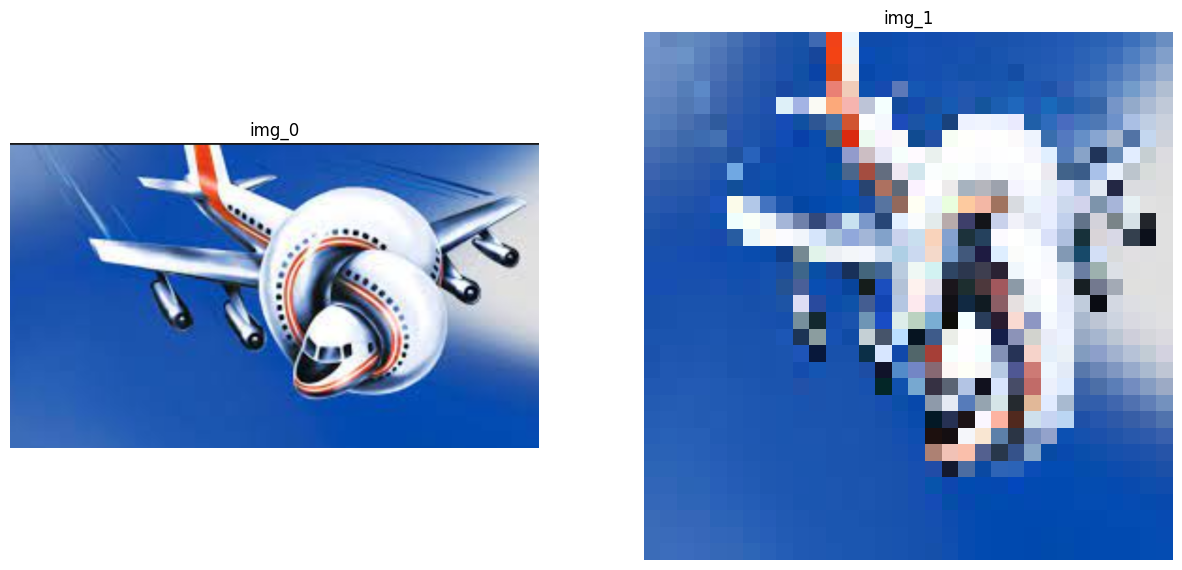

In [ ]:
# Read image from the specified path and store it in img1 variable
img1 = cv2.imread('/content/drive/MyDrive/images/1.jpg', -1)

# Convert the color of the image from BGR to RGB using cvtColor() function
desired_image1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Resize the image to 32x32 pixels using resize() function
desired_image_resized1 = cv2.resize(desired_image1, (32, 32))

# Normalize the pixel values of the resized image to be between 0 and 1
# by dividing each pixel value by 255 and casting it to float32 using astype() function
desired_image_normalized1 = desired_image_resized1.astype('float32') / 255

# Add an additional dimension to the normalized image using expand_dims() function
desired_image_reshaped1 = np.expand_dims(desired_image_normalized1, axis=0)

# Use the trained model to predict the label of the input image
preds1 = model.predict(desired_image_reshaped1)

# Find the predicted label index with highest probability using argmax() function
predicted_label1 = np.argmax(preds1)

# Print the predicted label using the corresponding classes list
print("predicted as.....", classes[predicted_label1])


# Display the original and resized image side by side using show_mult_img() function
show_mult_img(1, 2, (desired_image1, desired_image_resized1))

1/1 [==============================] - 0s 20ms/step
predicted as..... airplane


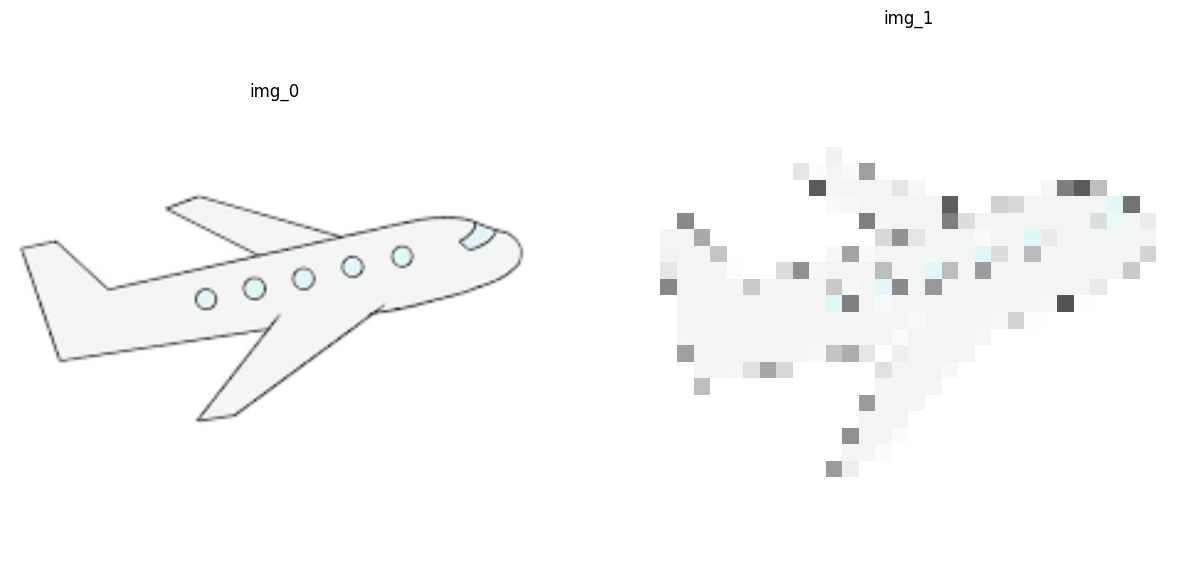

In [ ]:
# Read image from the specified path and store it in img2 variable
img2 = cv2.imread('/content/drive/MyDrive/images/2.jpg', -1)

# Convert the color of the image from BGR to RGB using cvtColor() function
desired_image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Resize the image to 32x32 pixels using resize() function
desired_image_resized2 = cv2.resize(desired_image2, (32, 32))

# Normalize the pixel values of the resized image to be between 0 and 1
# by dividing each pixel value by 255 and casting it to float32 using astype() function
desired_image_normalized2 = desired_image_resized2.astype('float32') / 255

# Add an additional dimension to the normalized image using expand_dims() function
desired_image_reshaped2 = np.expand_dims(desired_image_normalized2, axis=0)

# Use the trained model to predict the label of the input image
preds2 = model.predict(desired_image_reshaped2)

# Find the predicted label index with highest probability using argmax() function
predicted_label2 = np.argmax(preds2)

# Print the predicted label using the corresponding classes list
print("predicted as.....", classes[predicted_label2])


# Display the original and resized image side by side using show_mult_img() function
show_mult_img(1, 2, (desired_image2, desired_image_resized2))

1/1 [==============================] - 0s 17ms/step
predicted as..... airplane


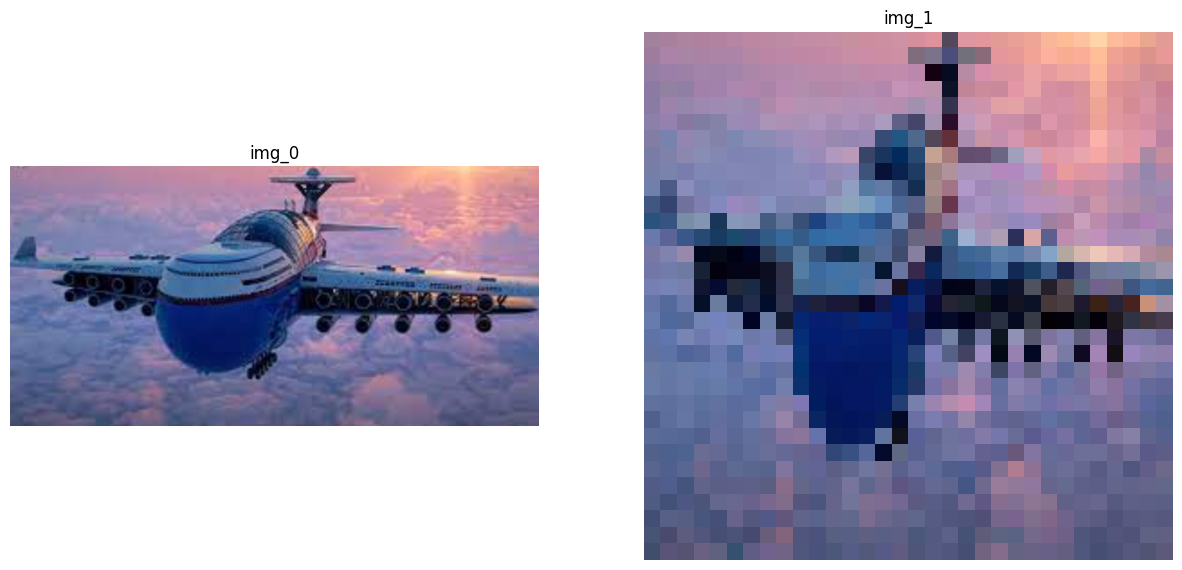

In [ ]:
# Read image from the specified path and store it in img3 variable
img3 = cv2.imread('/content/drive/MyDrive/images/3.jpg', -1)

# Convert the color of the image from BGR to RGB using cvtColor() function
desired_image3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Resize the image to 32x32 pixels using resize() function
desired_image_resized3 = cv2.resize(desired_image3, (32, 32))

# Normalize the pixel values of the resized image to be between 0 and 1
# by dividing each pixel value by 255 and casting it to float32 using astype() function
desired_image_normalized3 = desired_image_resized3.astype('float32') / 255

# Add an additional dimension to the normalized image using expand_dims() function
desired_image_reshaped3 = np.expand_dims(desired_image_normalized3, axis=0)

# Use the trained model to predict the label of the input image
preds3 = model.predict(desired_image_reshaped3)

# Find the predicted label index with highest probability using argmax() function
predicted_label3 = np.argmax(preds3)

# Print the predicted label using the corresponding classes list
print("predicted as.....", classes[predicted_label3])


# Display the original and resized image side by side using show_mult_img() function
show_mult_img(1, 2, (desired_image3, desired_image_resized3))

1/1 [==============================] - 0s 17ms/step
predicted as..... ship


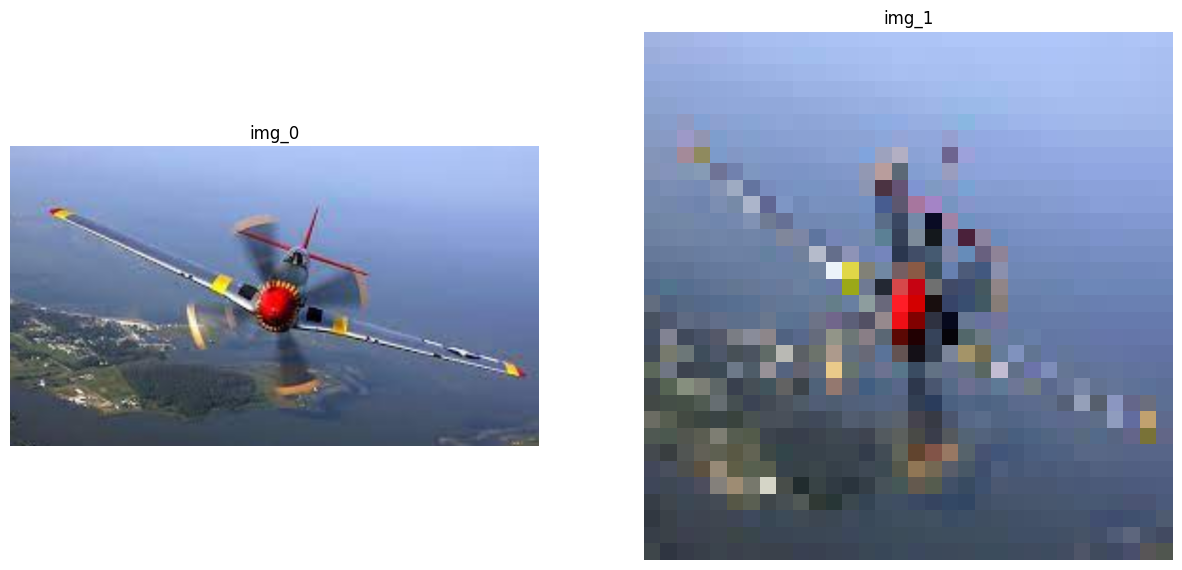

In [ ]:
# Read image from the specified path and store it in img4 variable
img4 = cv2.imread('/content/drive/MyDrive/images/4.jpg', -1)

# Convert the color of the image from BGR to RGB using cvtColor() function
desired_image4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

# Resize the image to 32x32 pixels using resize() function
desired_image_resized4 = cv2.resize(desired_image4, (32, 32))

# Normalize the pixel values of the resized image to be between 0 and 1
# by dividing each pixel value by 255 and casting it to float32 using astype() function
desired_image_normalized4 = desired_image_resized4.astype('float32') / 255

# Add an additional dimension to the normalized image using expand_dims() function
desired_image_reshaped4 = np.expand_dims(desired_image_normalized4, axis=0)

# Use the trained model to predict the label of the input image
preds4 = model.predict(desired_image_reshaped4)

# Find the predicted label index with highest probability using argmax() function
predicted_label4 = np.argmax(preds4)

# Print the predicted label using the corresponding classes list
print("predicted as.....", classes[predicted_label4])


# Display the original and resized image side by side using show_mult_img() function
show_mult_img(1, 2, (desired_image4, desired_image_resized4))

1/1 [==============================] - 0s 17ms/step
predicted as..... airplane


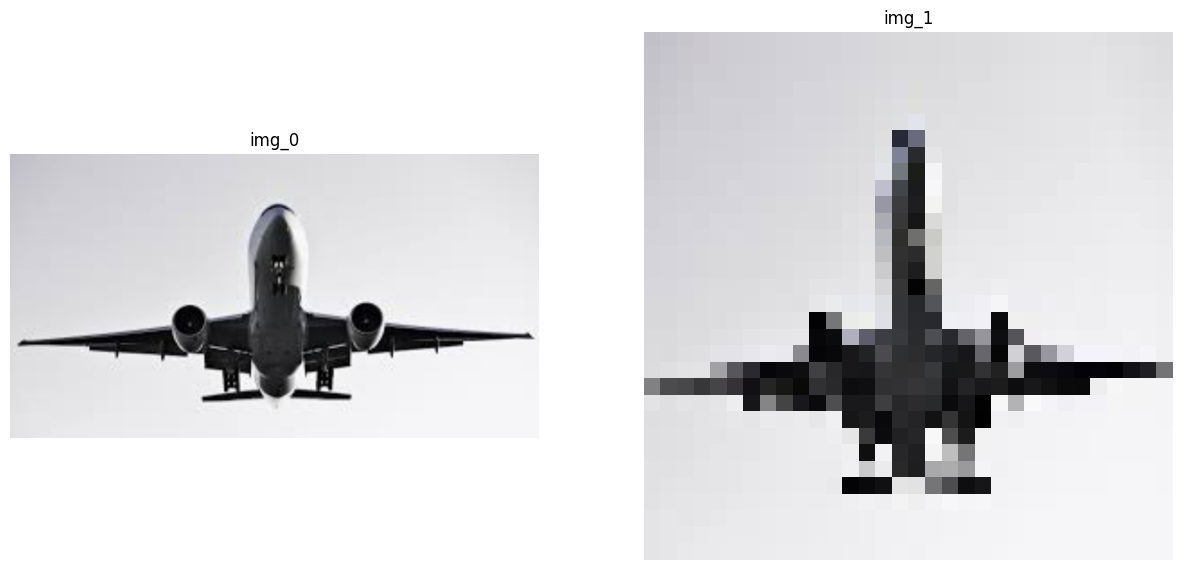

In [ ]:
# Read image from the specified path and store it in img5 variable
img5 = cv2.imread('/content/drive/MyDrive/images/5.jpg', -1)

# Convert the color of the image from BGR to RGB using cvtColor() function
desired_image5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

# Resize the image to 32x32 pixels using resize() function
desired_image_resized5 = cv2.resize(desired_image5, (32, 32))

# Normalize the pixel values of the resized image to be between 0 and 1
# by dividing each pixel value by 255 and casting it to float32 using astype() function
desired_image_normalized5 = desired_image_resized5.astype('float32') / 255

# Add an additional dimension to the normalized image using expand_dims() function
desired_image_reshaped5 = np.expand_dims(desired_image_normalized5, axis=0)

# Use the trained model to predict the label of the input image
preds5 = model.predict(desired_image_reshaped5)

# Find the predicted label index with highest probability using argmax() function
predicted_label5 = np.argmax(preds5)

# Print the predicted label using the corresponding classes list
print("predicted as.....", classes[predicted_label5])


# Display the original and resized image side by side using show_mult_img() function
show_mult_img(1, 2, (desired_image5, desired_image_resized5))

1/1 [==============================] - 0s 20ms/step
predicted as..... airplane


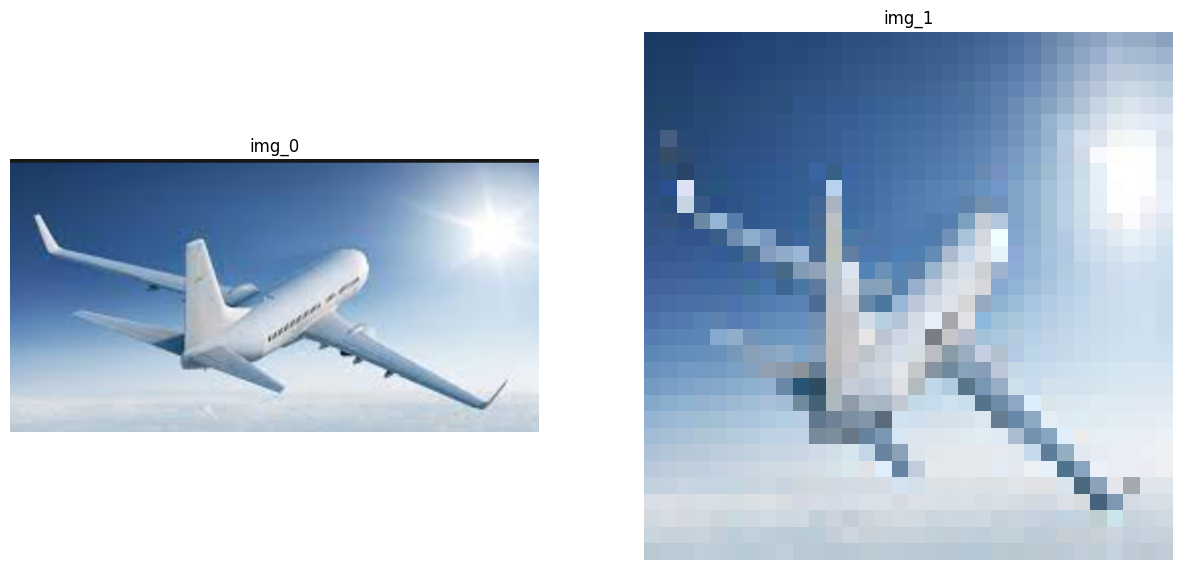

In [ ]:
# Read image from the specified path and store it in img6 variable
img6 = cv2.imread('/content/drive/MyDrive/images/6.jpg', -1)

# Convert the color of the image from BGR to RGB using cvtColor() function
desired_image6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)

# Resize the image to 32x32 pixels using resize() function
desired_image_resized6 = cv2.resize(desired_image6, (32, 32))

# Normalize the pixel values of the resized image to be between 0 and 1
# by dividing each pixel value by 255 and casting it to float32 using astype() function
desired_image_normalized6 = desired_image_resized6.astype('float32') / 255

# Add an additional dimension to the normalized image using expand_dims() function
desired_image_reshaped6 = np.expand_dims(desired_image_normalized6, axis=0)

# Use the trained model to predict the label of the input image
preds6 = model.predict(desired_image_reshaped6)

# Find the predicted label index with highest probability using argmax() function
predicted_label6 = np.argmax(preds6)

# Print the predicted label using the corresponding classes list
print("predicted as.....", classes[predicted_label6])


# Display the original and resized image side by side using show_mult_img() function
show_mult_img(1, 2, (desired_image6, desired_image_resized6))